In [40]:
import os
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

In [41]:
image_base_path = "../data/images/"
tensor_output_path = "../data/tensor_images/"

In [42]:
os.makedirs(tensor_output_path, exist_ok=True)

In [43]:
categories = ["GoogleEmoji", "JoyPixelsEmoji", "OpenMojiEmoji", "TwitterEmoji"]

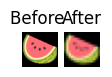

In [44]:
for category in categories:
    category_folder = os.path.join(image_base_path, category)

    if not os.path.exists(category_folder):
        print(f"Folder not found: {category_folder}")
        continue

    image_files = os.listdir(category_folder)
    if len(image_files) == 0:
        print(f"No images in {category_folder}")
        continue

    img_path = os.path.join(category_folder, image_files[156])
    
    # Open Image
    img = Image.open(img_path).convert('RGB')

    # Resize 
    resized_img = img.resize((16, 16))

    plt.figure(figsize=(1, 1))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Before ")
    plt.axis("off")

    # Resized Image
    plt.subplot(1, 2, 2)
    plt.imshow(resized_img)
    plt.title("After")
    plt.axis("off")

    plt.show()
    break  

In [45]:
base_transform = transforms.Compose([
    transforms.Resize((16, 16)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [46]:
for category in categories:
    category_folder = os.path.join(image_base_path, category)
    tensor_category_path = os.path.join(tensor_output_path, category)

    os.makedirs(tensor_category_path, exist_ok=True)

    for filename in os.listdir(category_folder):
        img_path = os.path.join(category_folder, filename)

        new_name = filename.replace("emoji_u", "").replace("_", "-").lower()
        new_name = new_name.replace("-fe0f", "").replace("-200d", "")

        img = Image.open(img_path).convert('RGB')
        img_tensor = base_transform(img)

        # Save as .pt file
        tensor_file = new_name.replace(".png", ".pt").replace(".jpg", ".pt")
        torch.save(img_tensor, os.path.join(tensor_category_path, tensor_file))

        print(f"Processed: {filename} -> {tensor_file}")

print("All images processed successfully!")

Processed: emoji_u0023.png -> 0023.pt
Processed: emoji_u0023_20e3.png -> 0023-20e3.pt
Processed: emoji_u002a.png -> 002a.pt
Processed: emoji_u002a_20e3.png -> 002a-20e3.pt
Processed: emoji_u0030.png -> 0030.pt
Processed: emoji_u0030_20e3.png -> 0030-20e3.pt
Processed: emoji_u0031.png -> 0031.pt
Processed: emoji_u0031_20e3.png -> 0031-20e3.pt
Processed: emoji_u0032.png -> 0032.pt
Processed: emoji_u0032_20e3.png -> 0032-20e3.pt
Processed: emoji_u0033.png -> 0033.pt
Processed: emoji_u0033_20e3.png -> 0033-20e3.pt
Processed: emoji_u0034.png -> 0034.pt
Processed: emoji_u0034_20e3.png -> 0034-20e3.pt
Processed: emoji_u0035.png -> 0035.pt
Processed: emoji_u0035_20e3.png -> 0035-20e3.pt
Processed: emoji_u0036.png -> 0036.pt
Processed: emoji_u0036_20e3.png -> 0036-20e3.pt
Processed: emoji_u0037.png -> 0037.pt
Processed: emoji_u0037_20e3.png -> 0037-20e3.pt
Processed: emoji_u0038.png -> 0038.pt
Processed: emoji_u0038_20e3.png -> 0038-20e3.pt
Processed: emoji_u0039.png -> 0039.pt
Processed: emoji

In [47]:
# Prompt(GPT 4o): make data loader to load above image file which are saved in tensor
class EmojiDataset(Dataset):
    def __init__(self, tensor_dir, transform=None):
        self.tensor_dir = tensor_dir
        self.transform = transform
        self.tensor_files = [os.path.join(root, file) 
                             for root, _, files in os.walk(tensor_dir) 
                             for file in files if file.endswith('.pt')]

    def __len__(self):
        return len(self.tensor_files)

    def __getitem__(self, idx):
        tensor_path = self.tensor_files[idx]
        image_tensor = torch.load(tensor_path)
        
        if self.transform:
            image_tensor = self.transform(image_tensor)
        
        return image_tensor

# Create dataset and dataloader
emoji_dataset = EmojiDataset(tensor_output_path)
emoji_dataloader = DataLoader(emoji_dataset, batch_size=32, shuffle=True)

# Example: Iterate through the dataloader
for batch in emoji_dataloader:
    print(batch.shape)
    break

torch.Size([32, 3, 16, 16])
